In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import scipy.stats as stat
from scipy import asarray as ar,exp

In [23]:
T=300
kb=1.38064852*10**(-23)
Na=6.02214e23

def gaussian(x,a,b,c):
    func=a*exp(-(x-b)**2/(2*c**2))
    return(func)

def gaus(x,a,x0,sigma):
    
    return(a*exp(-(x-x0)**2/(2*sigma**2)))

def making_me_bonds(bond):
    data1=pd.read_csv('bonds2_' +bond+'.xvg',skiprows=13,delim_whitespace=True, names=["bond","frequency"])
    num=sum(data1['frequency'])
    x= data1['bond']
    y=data1['frequency']/num
    x0 = sum((x)*(y))                  
    sigma = (sum(y*(x-x0)**2))**0.5
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('bond of '+bond)
    plt.ylabel('Frequency')
    plt.show()
    
    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const)
    
def making_me_angles(angle,unit):
    data=pd.read_csv('angdist2_' +angle+'.xvg',skiprows=13,delim_whitespace=True, names=["Angle","frequency"])
    if unit == 'radians' or unit == 'r':
        x= data['Angle']/57.296
        units=' (radians)'
    else:
        x= data['Angle']
        units=' (degrees)'
    y=data['frequency']

    n = len(data["Angle"])+1
    x0 = sum((x)*(data["frequency"]))
    sigma = sum(y*(x-x0)**2)
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('Angle of '+angle+units)
    plt.ylabel('Frequency')
    plt.show()

    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const)

## Angles

mean=   110.704327
sigma=  11.666903581


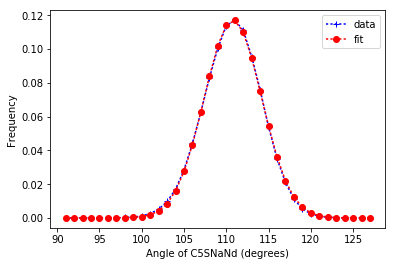

force constant=  0.824361939837


In [24]:
making_me_angles('C5SNaNd','d')

mean=   116.830739
sigma=  12.4011648707


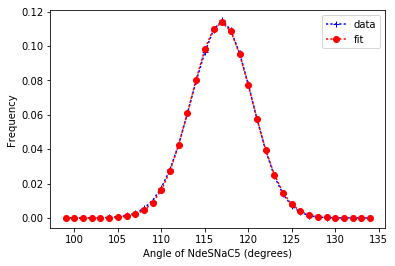

force constant=  0.723960421892


In [25]:
making_me_angles('NdeSNaC5','d')

mean=   124.912127
sigma=  6.8967162964


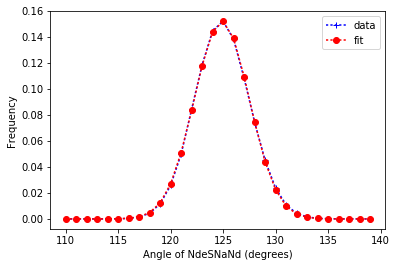

force constant=  0.637864816002


In [26]:
making_me_angles('NdeSNaNd','d')

mean=   162.622998
sigma=  22.1187873367


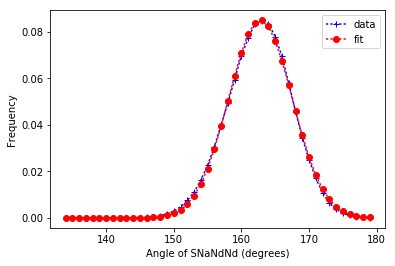

force constant=  0.401697717982


In [27]:
making_me_angles('SNaNdNd','d')

## Bonds

mean=   0.298711271837
sigma=  0.00526967741661


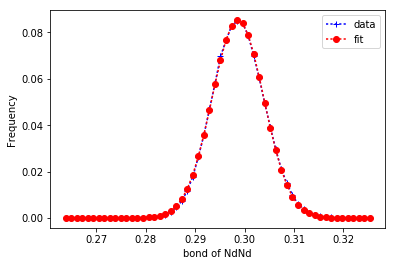

force constant=  126708.869311


In [13]:
making_me_bonds('NdNd')

mean=   0.309234662519
sigma=  0.00659388861328


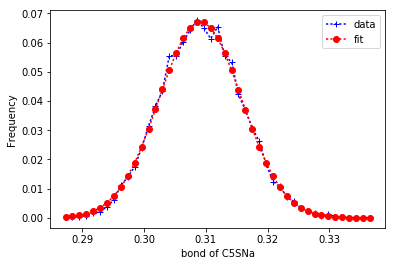

force constant=  116806.037298


In [14]:
making_me_bonds('C5SNa')

mean=   0.252896709228
sigma=  0.00451869565139


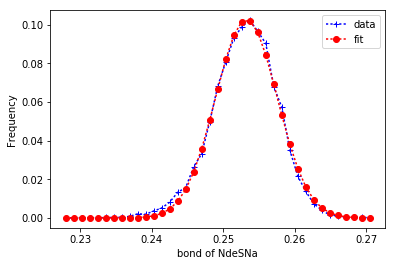

force constant=  188938.256345


In [15]:
making_me_bonds('NdeSNa')

mean=   0.311080591092
sigma=  0.00399046704003


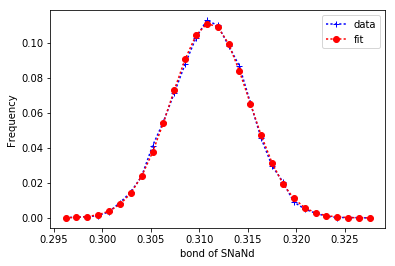

force constant=  124444.403052


In [16]:
making_me_bonds('SNaNd')

# Dihedrals

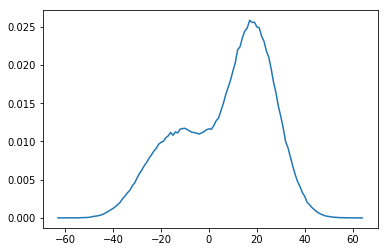

In [82]:
data1=pd.read_csv("dihdist2_C5SNaNdNd.xvg", skiprows=13,delim_whitespace=True, names=["dihedral","frequency"])
plt.plot(data1['dihedral'],data1['frequency'])
plt.show()

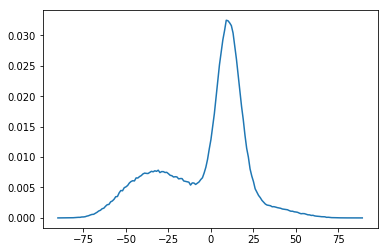

In [88]:
data1=pd.read_csv("dihdist2_NdeSNaNdNd.xvg", skiprows=13,delim_whitespace=True, names=["dihedral","frequency"])
plt.plot(data1['dihedral'],data1['frequency'])
plt.show()

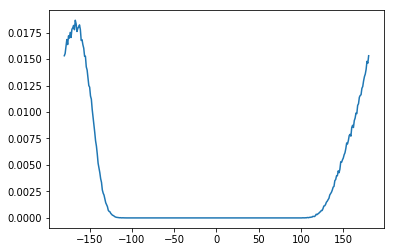

In [94]:
data1=pd.read_csv("dihdist2_SNaNdNdSNa.xvg", skiprows=22,delim_whitespace=True, names=["dihedral","frequency"])
plt.plot(data1['dihedral'],data1['frequency'])
plt.show()